<a href="https://colab.research.google.com/github/ChrisM1101/MSc/blob/main/pi_mc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving pi_mc.c to pi_mc.c


In [2]:
# Nikolaos Stergioulas, Aristotle University of Thessaloniki
#
# Content provided under a Creative Commons Attribution license, CC BY-NC-SA 4.0; code under GNU GPLv3 License.
# (c)2024 Nikolaos Stergioulas


import subprocess
import os
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

# Compile the C code
subprocess.run(["gcc", "-O3", "-fopenmp", "pi_mc.c", "-o", "pi_mc"])

# List of number of threads
num_threads_list = [1, 2, 4, 6, 8]

# List to store execution times
execution_times = []

In [3]:
# Choose how many random numbers to generate in the MC process
N = 1000000000

for num_threads in num_threads_list:
    # Set the OMP_NUM_THREADS environment variable
    os.environ["OMP_NUM_THREADS"] = str(num_threads)

    # Run the C code and measure the execution time
    start_time = time.time()
    subprocess.run(["./pi_mc", "-n", str(N)])
    end_time = time.time()

    # Calculate and store the execution time
    execution_time = end_time - start_time
    execution_times.append(execution_time)

In [4]:
# Create a DataFrame from the list of lists
table_data = []
for i in range(len(num_threads_list)):
    table_data.append([num_threads_list[i], execution_times[i]])

df = pd.DataFrame(table_data, columns=['Number of threads', 'Execution time (seconds)'])

# Print the table
print(df.to_string(index=False))

 Number of threads  Execution time (seconds)
                 1                 21.433866
                 2                 14.162847
                 4                 14.163077
                 6                 15.364222
                 8                 14.883076


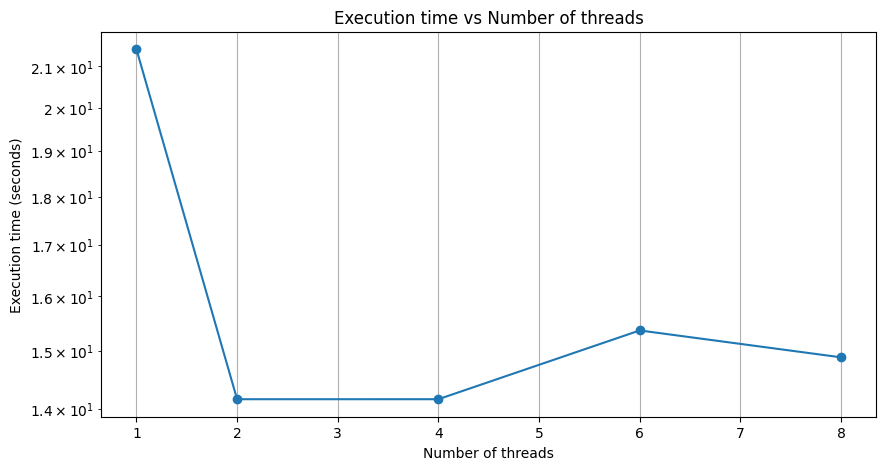

In [5]:
# Plot the execution times
plt.figure(figsize=(10, 5))
plt.plot(num_threads_list, execution_times, marker='o')
plt.xlabel('Number of threads')
plt.ylabel('Execution time (seconds)')
plt.title('Execution time vs Number of threads')
plt.yscale('log')  # Set the y-axis scale to logarithmic
plt.grid(True)
plt.show()

In [6]:
# Define the Amdahl's law function
def amdahls_law(n, p):
    return 1 / ((1 - p) + p / n)

# Calculate and plot the speedup
speedup = [execution_times[0] / t for t in execution_times]

# Select the data for the fit
num_fit = 5
num_threads_fit = num_threads_list[:num_fit]
speedup_fit = speedup[:num_fit]

# Fit the Amdahl's law function to the data
p_opt, _ = curve_fit(amdahls_law, num_threads_fit, speedup_fit)

# Calculate the fraction of the code that is parallelizable
parallelizable_fraction = p_opt[0]

# Print the result
print(f"The fraction of the code that is parallelizable is: {parallelizable_fraction}")

The fraction of the code that is parallelizable is: 0.3941209370866567


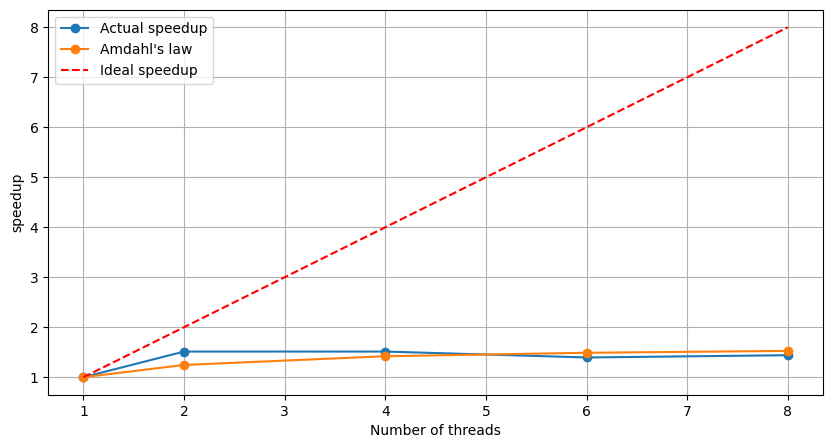

In [7]:
plt.figure(figsize=(10, 5))
#plt.plot(num_threads_list, execution_times, marker='o', label='Execution times')
plt.xlabel('Number of threads')
plt.ylabel('speedup')
#plt.title('Execution time vs Number of threads')
#plt.yscale('log')  # Set the y-axis scale to logarithmic
plt.grid(True)

# Calculate and plot the speedup
speedup = [execution_times[0] / t for t in execution_times]
plt.plot(num_threads_list, speedup, marker='o', label='Actual speedup')

# Calculate the predicted speedup times using Amdahl's law
predicted_speedup = [amdahls_law(num_threads, parallelizable_fraction) for num_threads in num_threads_list]
plt.plot(num_threads_list, predicted_speedup, marker='o', label="Amdahl's law")

# Create numpy array of points
x_points = np.array(num_threads_list)
y_points = x_points

# Add dashed red line for perfect speedup
plt.plot(x_points, y_points, color='red', linestyle='dashed', label="Ideal speedup")

# Add legend to the plot
plt.legend()

# Show the plot
plt.show()

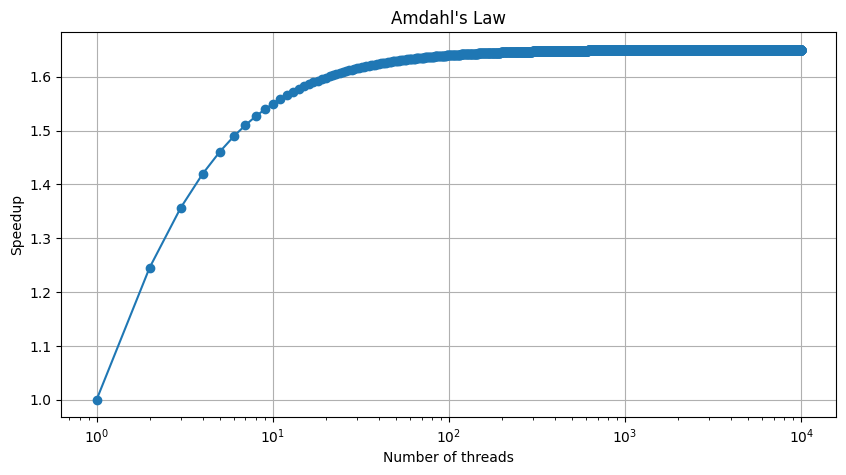

In [8]:
# Define the values for n (number of threads)
n_values = np.arange(1, 10000)

# Calculate the predicted execution times using Amdahl's law
predicted_execution_times = amdahls_law(n_values, parallelizable_fraction)

# Plot the predicted execution times
plt.figure(figsize=(10, 5))
plt.plot(n_values, predicted_execution_times, marker='o')
plt.xlabel('Number of threads')
plt.ylabel('Speedup')
plt.title("Amdahl's Law")
plt.xscale('log')  # Set the x-axis scale to logarithmic
plt.grid(True)
plt.show()

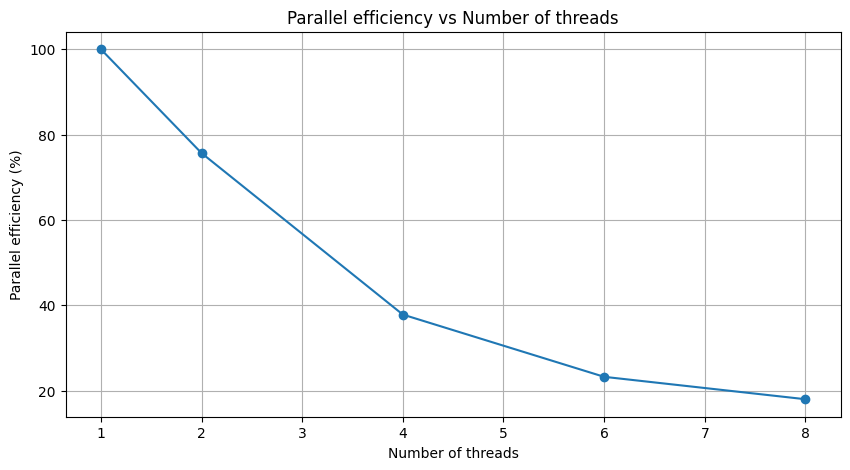

In [9]:
parallel_efficiency = [(execution_times[0] / (t * num_threads)) * 100 for t, num_threads in zip(execution_times, num_threads_list)]

plt.figure(figsize=(10, 5))
plt.plot(num_threads_list, parallel_efficiency, marker='o')
plt.xlabel('Number of threads')
plt.ylabel('Parallel efficiency (%)')
plt.title('Parallel efficiency vs Number of threads')
plt.grid(True)
plt.show()